# Vanilla embedding seq2seq experiment analysis, 2nd set of experiments

[Git commit](https://github.com/juditacs/morph-segmentation-experiments/commit/1f58181d92286878db5823569ac19ec69b7b3792)
## Experimental setup

* dataset: Hungarian Webcorpus segmented using the output of HuNLP-Gate
  * segmentation converted to standoff tagging using two tags: B (beginning morpheme), E (continuation of morpheme)
* architecture: embedding seq2seq with a single LSTM/GRU layer
* 200000 unique words-segmentation pairs were used
* fixed parameters: `batch_size`=1000
* early stopping: `validation split=0.1`, `patienc=10`, `val_loss_epsilon=1e-2`
* varying parameters uniformly sampled from these ranges:
 
| Parameter | Range |
| --- | --- |
| cell type | `['LSTM', 'GRU']` |
| cell size | `[16, 32, 64, 128, 256, 512, 1024, 2048]` | 
| embedding size | `range(2, 30)` |

### Misc

* each output is prefixed with a GO symbol, but no END symbol is used (maybe I should have used one?)

In [1]:
import pandas as pd
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (10, 7)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [2]:
results = pd.read_table('../results/webcorp.tagset_BE.layer_1.sample_200000_exp2.tsv')
results = results.sort_index(axis=1)
results.describe()

,conf.cell_size,conf.embedding_size,result.epochs_run,result.patience,result.running_time,result.test_loss,result.train_loss,result.val_loss,result.val_loss_th
count,199.000000,199.000000,199.000000,199.0,199.000000,199.000000,199.000000,199.000000,1.990000e+02
mean,157.829146,15.407035,103.517588,10.0,196.217124,2.028907,0.055382,2.028693,1.000000e-02
std,168.659932,8.601160,63.331965,0.0,229.743182,2.098824,0.046060,2.099216,1.739099e-18
min,16.000000,1.000000,18.000000,10.0,10.599116,0.099575,0.001781,0.100554,1.000000e-02
25%,32.000000,8.000000,74.000000,10.0,50.525958,0.315079,0.040265,0.316139,1.000000e-02
50%,128.000000,16.000000,89.000000,10.0,105.900904,1.633056,0.045798,1.631935,1.000000e-02
75%,256.000000,23.000000,110.500000,10.0,242.943961,2.988206,0.054716,2.988074,1.000000e-02
max,512.000000,29.000000,372.000000,10.0,1247.378381,9.527024,0.339295,9.529328,1.000000e-02


## Cell type

it does not seem to matter very much

In [3]:
results.groupby('conf.cell_type').describe()

conf.cell_size  conf.embedding_size  result.epochs_run  \
conf.cell_type                                                                 
GRU            count      103.000000           103.000000         103.000000   
               mean       143.689320            15.223301         126.980583   
               std        160.688411             8.442344          76.309866   
               min         16.000000             1.000000          23.000000   
               25%         32.000000             8.000000          82.000000   
               50%         64.000000            16.000000          98.000000   
               75%        256.000000            22.000000         146.500000   
               max        512.000000            29.000000         372.000000   
LSTM           count       96.000000            96.000000          96.000000   
               mean       173.000000            15.604167          78.343750   
               std        176.394773             8.808464          29.497485   
               min         16.000000             1.000000          18.000000   
               25%         32.000000             8.750000          63.750000   
               50%        128.000000            13.500000          82.500000   
               75%        256.000000            24.250000          94.250000   
               max        512.000000            29.000000         183.000000   

                      result.patience  result.running_time  result.test_loss  \
conf.cell_type                                                                 
GRU            count            103.0           103.000000        103.000000   
               mean              10.0           191.004667          2.434621   
               std                0.0           215.257620          2.627587   
               min               10.0            12.673757          0.099575   
               25%               10.0            58.182913          0.264926   
               50%               10.0           104.588750          1.117313   
               75%               10.0           214.200208          4.003555   
               max               10.0          1117.586323          9.527024   
LSTM           count             96.0            96.000000         96.000000   
               mean              10.0           201.809657          1.593611   
               std                0.0           245.351844          1.182453   
               min               10.0            10.599116          0.118685   
               25%               10.0            40.716751          0.366361   
               50%               10.0           106.913763          1.857305   
               75%               10.0           267.607995          2.633700   
               max               10.0          1247.378381          3.885032   

                      result.train_loss  result.val_loss  result.val_loss_th  
conf.cell_type                                                                
GRU            count         103.000000       103.000000        1.030000e+02  
               mean            0.040431         2.434375        1.000000e-02  
               std             0.025413         2.628010        1.743206e-18  
               min             0.001781         0.100554        1.000000e-02  
               25%             0.031737         0.261386        1.000000e-02  
               50%             0.040962         1.117134        1.000000e-02  
               75%             0.045962         4.011431        1.000000e-02  
               max             0.159313         9.529328        1.000000e-02  
LSTM           count          96.000000        96.000000        9.600000e+01  
               mean            0.071423         1.593430        1.000000e-02  
               std             0.056798         1.182916        1.743830e-18  
               min             0.031778         0.118364        1.000000e-02  
               25%             0.0

## Embedding size

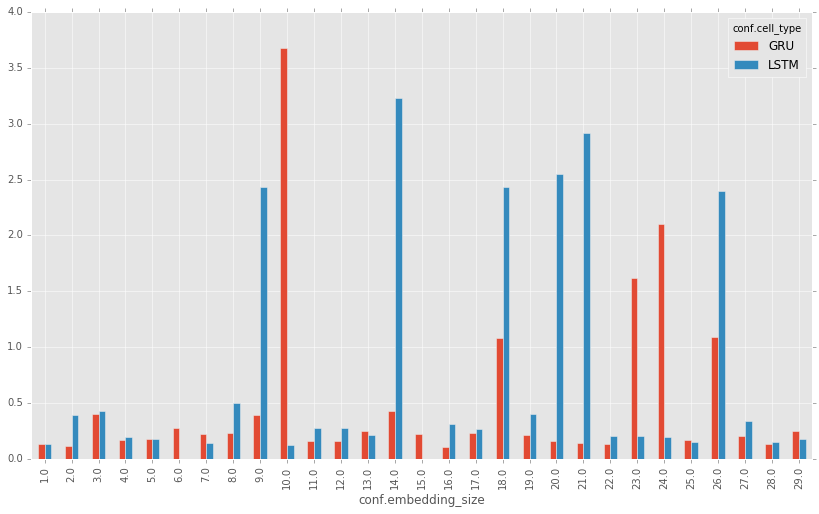

In [4]:
results.groupby(['conf.embedding_size', 'conf.cell_type']).min().unstack(
    'conf.cell_type').plot(y='result.test_loss', kind='bar', figsize=(14, 8))

In [5]:
results.groupby(['conf.embedding_size', 'conf.cell_type']).size()

conf.embedding_size  conf.cell_type
1.0                  GRU               2
                     LSTM              2
2.0                  GRU               6
                     LSTM              2
3.0                  GRU               4
                     LSTM              2
4.0                  GRU               4
                     LSTM              5
5.0                  GRU               3
                     LSTM              5
6.0                  GRU               2
7.0                  GRU               4
                     LSTM              6
8.0                  GRU               2
                     LSTM              2
9.0                  GRU               3
                     LSTM              3
10.0                 GRU               2
                     LSTM              7
11.0                 GRU               5
                     LSTM              5
12.0                 GRU               5
                     LSTM              5
13.0                 

## Cell size

Larger cell size than 512 seems to run out of memory.

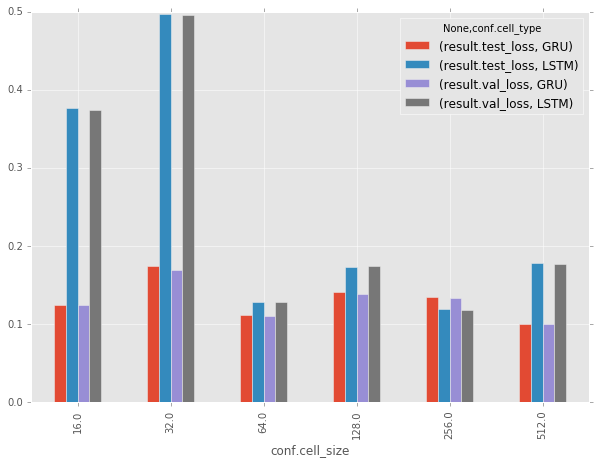

In [6]:
results.groupby(['conf.cell_type', 'conf.cell_size']).min().unstack('conf.cell_type').plot(
    y=['result.test_loss', 'result.val_loss'], kind='bar', figsize=(10, 7))

## Epoch number

Let's see how early stopping affects the number of epochs.

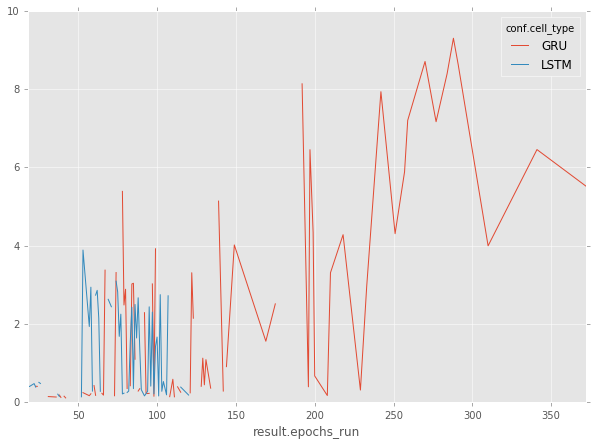

In [7]:
results.groupby(['conf.cell_type', 'result.epochs_run']).min().unstack('conf.cell_type').plot(
    y='result.test_loss', figsize=(10, 7))

# Val loss vs. test loss

In [8]:
results['val_test_diff'] = results['result.val_loss'] - results['result.test_loss']
results['val_test_diff'].describe()

count    199.000000
mean      -0.000214
std        0.006727
min       -0.046844
25%       -0.002127
50%       -0.000247
75%        0.000984
max        0.033112
Name: val_test_diff, dtype: float64

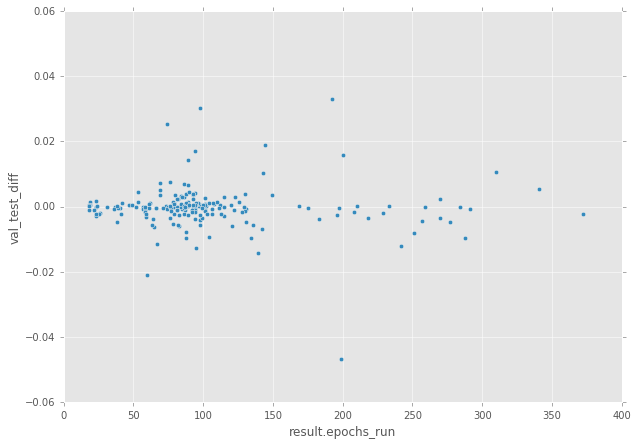

In [9]:
results.plot(x='result.epochs_run', y='val_test_diff', kind='scatter')